#Directory, Libraries and data

In [1]:
# Mount Google Drive to access files in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to folder
%cd /content/drive/MyDrive/Business Analyst course/Segmentation/Gaussian Mixture Model

In [4]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [5]:
# Load the data
# Credit Card data
df = pd.read_csv("CreditCard.csv")
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


#Data Preparation

In [6]:
# Transform categorical variables into numerical variables using one-hot encoding
df = pd.get_dummies(df, drop_first = True)
# Preview
df.head(2)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0,37.66667,4.52,0.033270,124.983300,3,54,1,12,True,True,False
1,0,33.25000,2.42,0.005217,9.854167,3,34,1,13,True,False,False


#Gaussian Mixture Model

Text(0.5, 0, 'Number of Components')

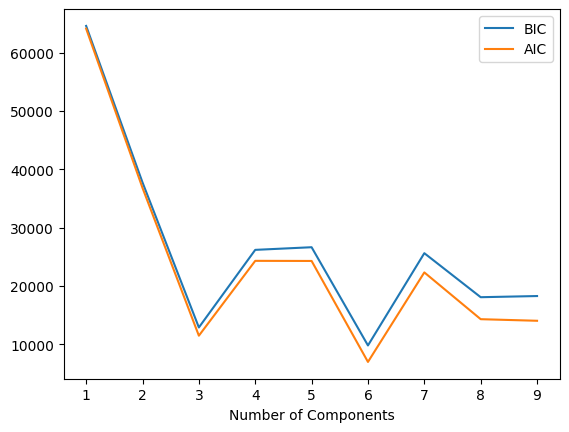

In [7]:
# Finding the optimal number of clusters using Gaussian Mixture Models (GMM)

# Define the range of components to test
n_components = np.arange(1,10)

# Create and fit GMM models for each number of components
models = [GaussianMixture(n_components= n,
                          random_state = 1502).fit(df) for n in n_components]

# Plot the Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) for each number of components
plt.plot(n_components,
         [m.bic(df) for m in models],
         label = 'BIC') # Bayesian Information Criterion
plt.plot(n_components,
         [m.aic(df) for m in models],
         label = 'AIC') # Akaike Information Criterion

# Add legend and x-axis label
plt.legend()
plt.xlabel('Number of Components')

In [8]:
# Fit a Gaussian Mixture Model (GMM) with 3 components to the data
model = GaussianMixture(n_components= 3,
                        random_state = 1502).fit(df)

#Interpretation

In [9]:
# Predict the cluster for each data point using the fitted GMM
cluster = pd.Series(model.predict(df))
cluster[:2]

,0
0,1
1,1


In [10]:
# Add the cluster assignments as a new column in the DataFrame
df['cluster'] = cluster
df.head(2)

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes,cluster
0,0,37.66667,4.52,0.033270,124.983300,3,54,1,12,True,True,False,1
1,0,33.25000,2.42,0.005217,9.854167,3,34,1,13,True,False,False,1


In [11]:
# Check how many people per cluster
df.cluster.value_counts()

,count
cluster,
1,720
2,303
0,296


In [12]:
# Interpretation
# Create a DataFrame with the means of each cluster, with feature names as columns
pd.DataFrame(model.means_,
             columns = list(df.iloc[:,:-1].columns))

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,1.587838,33.202984,3.068509,0.000477,0.000000,1.077703,55.300676,0.739865,6.054054,0.0,0.304054,0.094595
1,0.000000,32.503472,3.409851,0.088563,236.916958,0.951389,49.895833,1.000000,7.223611,1.0,0.469444,0.000000
2,0.435644,34.909241,3.549702,0.088288,242.607480,1.013201,68.000000,0.458746,7.379538,1.0,0.504950,0.207921


In [13]:
#Names
#Cluster 0: Non-Credit Users
#Cluster 1: Successful Entrepreneurs
#Cluster 2: young employees